jupyter:
  jupytext:
    text_representation:
      extension: .py
      format_name: light
      format_version: '1.5'
      jupytext_version: 1.13.6
  kernelspec:
    display_name: Python 3 (ipykernel)
    language: python
    name: python3

# Visualization for California housing regression

https://www.scikit-yb.org/en/latest/index.html

## Setup libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
from lightgbm import LGBMRegressor

In [4]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

## Get data

In [5]:
california_housing = fetch_california_housing(as_frame=True)

## Data summary

In [6]:
housing_raw = california_housing.frame

In [7]:
housing_raw.shape

(20640, 9)

List missing values

In [8]:
housing_raw.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## Get training and test data

In [9]:
housing_df, housing_unseen = train_test_split(
    housing_raw, test_size=0.2, random_state=42, shuffle=True
)

In [10]:
y_train = housing_df.MedHouseVal
X_train = housing_df.drop(columns=['MedHouseVal'])

## Gradient boosting regression

In [11]:
best_param = {
    "num_leaves": 31,
    "n_estimators": 400,
    "learning_rate": 0.1,
}

In [12]:
gbm_best = LGBMRegressor(**best_param)

In [13]:
gbm_best.fit(X_train, y_train)

LGBMRegressor(n_estimators=400)

In [14]:
y_test = housing_unseen.MedHouseVal
X_test = housing_unseen.drop(columns='MedHouseVal')

In [15]:
y_pred = gbm_best.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 {:.3f}".format(r2))

R2 0.854


## Regression visualization

### Residuals plot

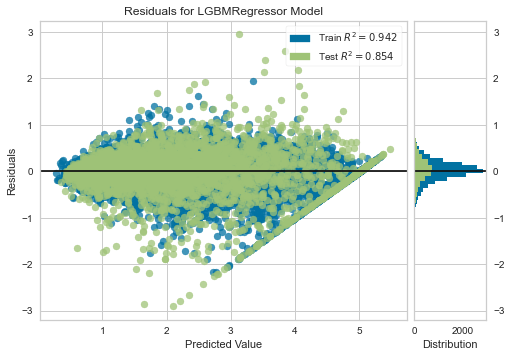

<AxesSubplot:title={'center':'Residuals for LGBMRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [16]:
gbm_best = LGBMRegressor(**best_param)
visualizer = ResidualsPlot(gbm_best)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Prediction error plot

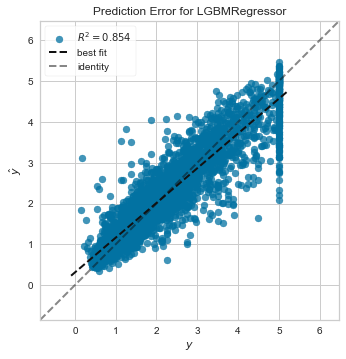

<AxesSubplot:title={'center':'Prediction Error for LGBMRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [17]:
visualizer = PredictionError(gbm_best)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure